<a href="https://colab.research.google.com/github/shaharbanu-123/FINAL-Project/blob/main/project_26_06_2025_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Setup & Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# CodeGrade Tag Init1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Load and Preprocess the Data**

In [3]:
# Load the csv
csv_loc = "/content/drive/MyDrive/cpcb_dly_aq_west_bengal-2010.csv"
df = pd.read_csv(csv_loc)

# Rename RSPM/PM10 column to PM10
df = df.rename(columns={'RSPM/PM10': 'PM10'})
# Rename Sampling Date to Date
df = df.rename(columns={'Sampling Date' : ' Date'})

df.head()



,Stn Code,Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,PM10,SPM
0,386,1/1/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,10.0,80.1,252.000000,525.0
1,386,1/3/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,10.6,84.1,248.000000,516.0
2,386,1/8/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.8,85.2,253.666667,527.0
3,386,1/12/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.2,77.6,255.333333,521.0
4,386,14-01-10,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.7,84.8,241.666667,511.0


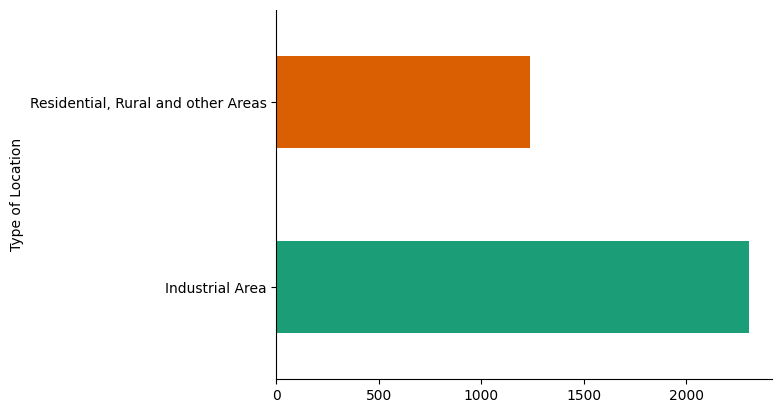

In [ ]:
# @title Type of Location

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type of Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

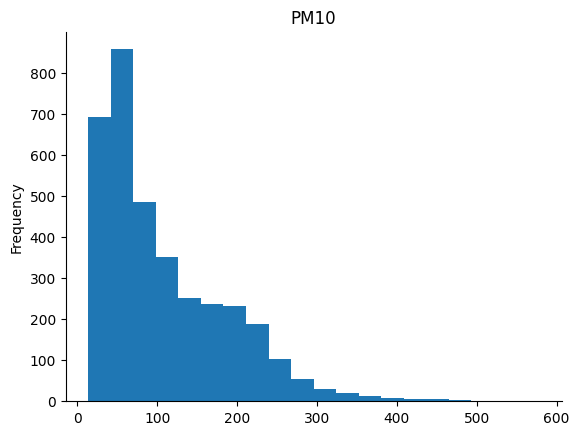

In [ ]:
# @title PM10

from matplotlib import pyplot as plt
df['PM10'].plot(kind='hist', bins=20, title='PM10')
plt.gca().spines[['top', 'right',]].set_visible(False)

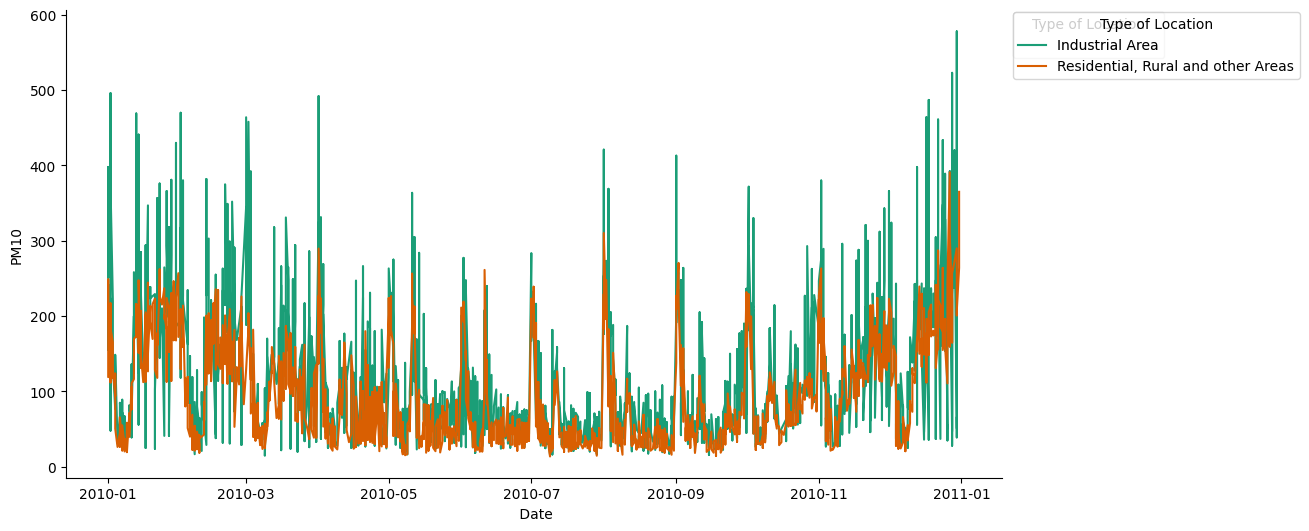

In [ ]:
# @title  Date vs PM10

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Date']
  ys = series['PM10']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values(' Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Type of Location')):
  _plot_series(series, series_name, i)
  fig.legend(title='Type of Location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Date')
_ = plt.ylabel('PM10')

In [4]:
# Parse date column and sort
df[' Date'] = pd.to_datetime(df[' Date'], format='mixed', dayfirst=True, errors='coerce')

df = df.sort_values(' Date')

# Filter PM2.5 values for a selected location
city_df = df[df['City/Town/Village/Area'] == 'Kolkata'][[' Date', 'PM10']].dropna()

# Resample daily average if needed
city_df = city_df.set_index( ' Date').resample('D').mean()

df.head()
city_df.head()

,PM10
Date,
2010-01-01,155.000000
2010-01-02,193.833333
2010-01-03,133.000000
2010-01-04,76.333333
2010-01-05,30.666667


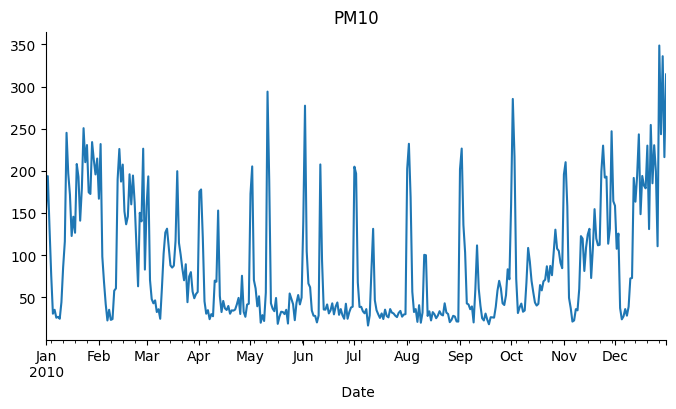

In [ ]:
# @title PM10

from matplotlib import pyplot as plt
city_df['PM10'].plot(kind='line', figsize=(8, 4), title='PM10')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extract month for grouping
df['Day'] = df[' Date'].dt.day
df['Month'] = df[' Date'].dt.strftime('%b')
df['Month_Num'] = df[' Date'].dt.month  # to sort months later


In [6]:
# Group by month and day, then get average PM10
pivot_df = df.groupby(['Month_Num', 'Month', 'Day'])['PM10'].mean().reset_index()

# Pivot table: rows = day, columns = month
heatmap_data = pivot_df.pivot(index='Day', columns='Month', values='PM10')

# Sort months in calendar order
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heatmap_data = heatmap_data[month_order]


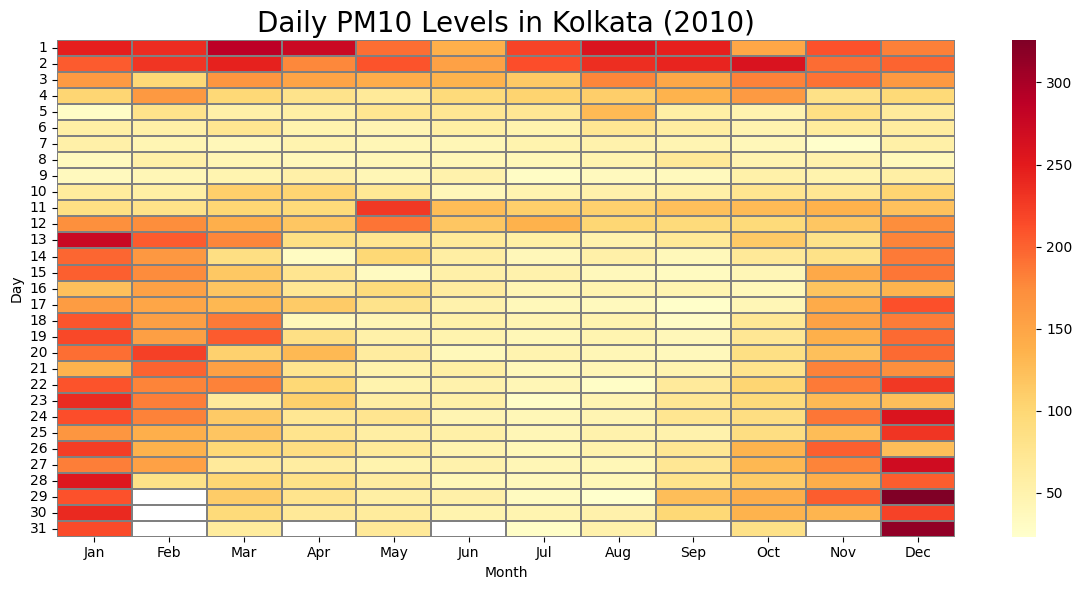

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3, linecolor='gray', annot=False)
plt.title('Daily PM10 Levels in Kolkata (2010)', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Day')
plt.tight_layout()
plt.show()



# **3.LSTM Forecasting**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0392 - val_loss: 0.0428
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0317 - val_loss: 0.0473
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0325 - val_loss: 0.0385
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0244 - val_loss: 0.0368
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0278 - val_loss: 0.0420
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0259 - val_loss: 0.0355
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0213 - val_loss: 0.0378
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0218 - val_loss: 0.0330
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0246 - val_loss: 0.0377
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0237 - val_loss: 0.0343
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0260 - val_loss: 0.0344
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0188 - val_l

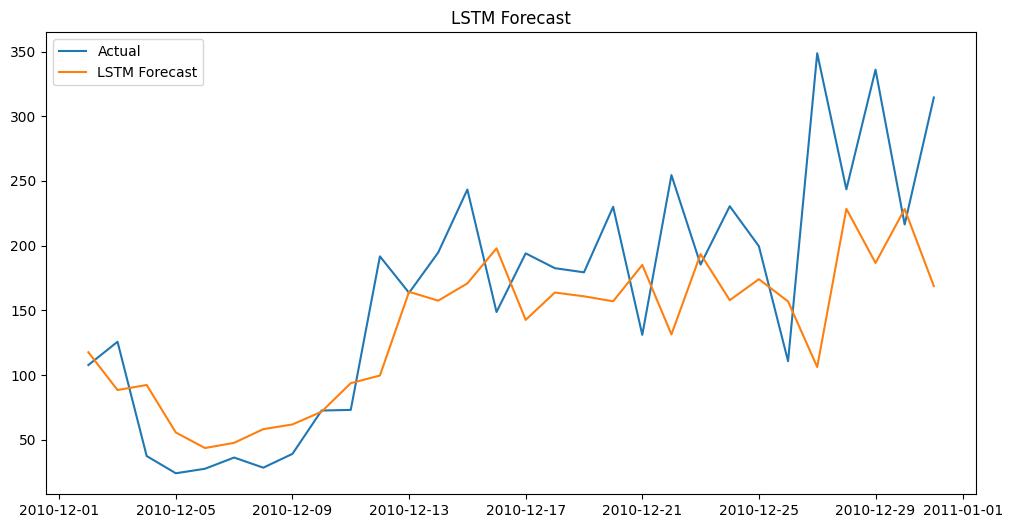

In [105]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Scaling (Normalize)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(city_df.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Define window_size
window_size = 30
X, y = create_sequences(scaled, window_size)
X = X.reshape((-1, window_size, 1))

# Create sequences
X, y = create_sequences(scaled, window_size)


from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten


# Split into train/test
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Model
model = Sequential([
    LSTM(64, input_shape=(window_size, 1),return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=16,
          callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Forecast
preds = model.predict(X_test)
preds_inverse = scaler.inverse_transform(preds)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(city_df.index[-30:], scaler.inverse_transform(y_test), label='Actual')
plt.plot(city_df.index[-30:], preds_inverse, label='LSTM Forecast')
plt.legend()
plt.title('LSTM Forecast')
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score
 #Evaluate forcast
def evaluate_forecast(true, pred, label='Model'):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    r2 = r2_score(true, pred)
    accuracy = 100 - mape
    print(f"{label} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, R²: {r2:.4f}, Forecast Accuracy: {accuracy:.2f}%")
    return rmse, mae, mape, r2, accuracy

#Plot Residual
def plot_residuals(true, pred, label='Model'):
    residuals = true.flatten() - pred.flatten()
    plt.figure(figsize=(10, 4))
    plt.plot(residuals, label=f'{label} Residuals')
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f'Residual Plot - {label}')
    plt.legend()
    plt.show()

LSTM - RMSE: 73.69, MAE: 51.44, MAPE: 38.72%, R²: 0.3575, Forecast Accuracy: 61.28%


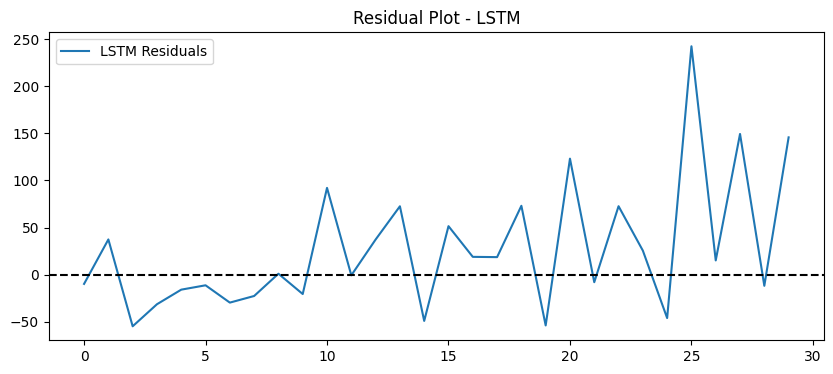

In [107]:
# Evaluate LSTM
lstm_rmse, lstm_mae, lstm_mape, lstm_r2, lstm_accuracy = evaluate_forecast(scaler.inverse_transform(y_test), preds_inverse, 'LSTM')
plot_residuals(scaler.inverse_transform(y_test), preds_inverse, 'LSTM')

In [108]:
#Camparison table

import pandas as pd

metrics_df = pd.DataFrame({
    'Model': ['LSTM'],
    'RMSE': [ lstm_rmse],
    'MAE': [ lstm_mae],
    'MAPE (%)': [ lstm_mape],
    'R²': [lstm_r2],
    'Forecast Accuracy (%)': [lstm_accuracy]
    })

metrics_df.set_index('Model', inplace=True)
metrics_df.style.background_gradient(cmap='RdYlGn_r').format("{:.2f}")


,RMSE,MAE,MAPE (%),R²,Forecast Accuracy (%)
Model,,,,,
LSTM,73.69,51.44,38.72,0.36,61.28
